<a href="https://colab.research.google.com/github/datawilly/Procesamiento-de-lenguaje-natural/blob/main/ROSALES_WILLIAM_PEC_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importamos las librerias necesarias

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from gensim.models import Word2Vec
from gensim.models.doc2vec import TaggedDocument
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import os
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

pd.set_option('display.max_colwidth', 150)
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\William\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\William\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Cargamos el dataset dating_app.csv
reviews_complete = pd.read_csv("dating_app.csv")

In [ ]:
# Vemos el dataset
reviews_complete.head()

,reviewId,content,thumbsUpCount,reviewCreatedVersion,at,score,app
0,a3a26939-0dda-4993-8e3d-21159b9d6f9e,"""Oops, something went wrong"" Every time I try to log in",0,NaN,2024-02-07 01:11:25,1,Tinder
1,00d69f0a-568f-4781-9c98-055f6e009cea,The limited amount of likes plus the amount of spam bots makes the whole experience trash. I really wish I could give it zero stars. Edit update: ...,14,15.0.0,2024-02-07 00:54:12,1,Tinder
2,4f4a0fde-7f03-493e-8626-93089945ef07,"ehhh.. .I prefer meeting people face to face but that has become a lost art form. Sometimes, you have to try something new",0,15.0.0,2024-02-07 00:49:45,3,Tinder
3,66985b4d-e6d5-4bff-838f-818d5c15ae30,"You Broke It. This app was already broken, and all around lacking in comparison to other dating apps available. And just when you thought it can't...",0,15.1.0,2024-02-07 00:48:00,1,Tinder
4,e6daf19c-ba9c-4eb6-a4b5-5d5712460ea7,"Just got the app today, says it's under review should only take a couple minutes. I can't get into it. And this has been hours now.",0,15.1.0,2024-02-07 00:47:19,1,Tinder


In [ ]:
#Creamos la funcion que clasifica los comentarios en positivos o negativos de acuerdo al score
def classify_score(score):
    if score >= 1 and score <= 3:
        return 'negativa'
    elif score >= 4 and score <= 5:
        return 'positiva'
    else:
        return 'unknown'

reviews_complete['classification'] = reviews_complete['score'].apply(classify_score)
reviews_complete = pd.DataFrame(reviews_complete)
print("\nDataFrame con clasificación:")
reviews_complete



DataFrame con clasificación:


,reviewId,content,thumbsUpCount,reviewCreatedVersion,at,score,app,classification
0,a3a26939-0dda-4993-8e3d-21159b9d6f9e,"""Oops, something went wrong"" Every time I try to log in",0,NaN,2024-02-07 01:11:25,1,Tinder,negativa
1,00d69f0a-568f-4781-9c98-055f6e009cea,The limited amount of likes plus the amount of spam bots makes the whole experience trash. I really wish I could give it zero stars. Edit update: ...,14,15.0.0,2024-02-07 00:54:12,1,Tinder,negativa
2,4f4a0fde-7f03-493e-8626-93089945ef07,"ehhh.. .I prefer meeting people face to face but that has become a lost art form. Sometimes, you have to try something new",0,15.0.0,2024-02-07 00:49:45,3,Tinder,negativa
3,66985b4d-e6d5-4bff-838f-818d5c15ae30,"You Broke It. This app was already broken, and all around lacking in comparison to other dating apps available. And just when you thought it can't...",0,15.1.0,2024-02-07 00:48:00,1,Tinder,negativa
4,e6daf19c-ba9c-4eb6-a4b5-5d5712460ea7,"Just got the app today, says it's under review should only take a couple minutes. I can't get into it. And this has been hours now.",0,15.1.0,2024-02-07 00:47:19,1,Tinder,negativa
...,...,...,...,...,...,...,...,...
239995,ea6a1f6f-ac18-4d49-9599-1e0caac038ca,"Fun and unique, enjoyable, informative, pretty cool so far",0,1.13.7,2023-07-13 14:48:08,4,Boo,positiva
239996,e00414e3-7b4a-4c39-8630-1deb6998c817,"The app design is really nice, and there's a lot of quizzes to try and pinpoint specifics about you. I find that kinda neat. Just didn't give 5 st...",0,1.13.7,2023-07-13 14:41:43,4,Boo,positiva
239997,cc41f8a1-8f1c-457a-984d-850fc080fcc1,"Decided to edit and leave a more detailed review. So, I took the personality test on the app and it was VERY VERY accurate. The details it have ab...",35,1.13.7,2023-07-13 14:35:18,5,Boo,positiva
239998,7a47da1f-5578-4ef1-b15f-1559ca8dfe11,Hard to find people in same town...just realised the company is in asia...non english speaking customer service and no way of searching in your ow...,0,1.13.7,2023-07-13 14:33:11,1,Boo,negativa


In [ ]:
# Extraemos las columnas content y clasification en un nuevo dataframe
reviews = reviews_complete[["content", "classification"]]

In [ ]:
# Verificamos que se enccuentre correcto
reviews.head()

,content,classification
0,"""Oops, something went wrong"" Every time I try to log in",negativa
1,The limited amount of likes plus the amount of spam bots makes the whole experience trash. I really wish I could give it zero stars. Edit update: ...,negativa
2,"ehhh.. .I prefer meeting people face to face but that has become a lost art form. Sometimes, you have to try something new",negativa
3,"You Broke It. This app was already broken, and all around lacking in comparison to other dating apps available. And just when you thought it can't...",negativa
4,"Just got the app today, says it's under review should only take a couple minutes. I can't get into it. And this has been hours now.",negativa


In [ ]:
# Extraemos las reseñas para el preprocesado
contents = reviews_complete['content']
contents

0                                                                                                       "Oops, something went wrong" Every time I try to log in
1         The limited amount of likes plus the amount of spam bots makes the whole experience trash. I really wish I could give it zero stars. Edit update: ...
2                                    ehhh.. .I prefer meeting people face to face but that has become a lost art form. Sometimes, you have to try something new
3         You Broke It. This app was already broken, and all around lacking in comparison to other dating apps available. And just when you thought it can't...
4                           Just got the app today, says it's under review should only take a couple minutes. I can't get into it. And this has been hours now.
                                                                                  ...                                                                          
239995                                  

In [ ]:
# Eliminamos los signos de puntuacion y trasnformamos a minusculas
contents = contents.str.replace("[^\w\s\d]", "")
contents = contents.str.lower()

C:\Users\William\AppData\Local\Temp\ipykernel_17772\2909069010.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  contents = contents.str.replace("[^\w\s\d]", "")


In [ ]:
# Guardamos las reseñas transformadas en el dataframe que creamos anteriormente
reviews = pd.DataFrame(contents)
reviews["clasificacion"] = reviews_complete["classification"]

In [ ]:
# Verificamos que esté correcto
reviews.head()

,content,clasificacion
0,oops something went wrong every time i try to log in,negativa
1,the limited amount of likes plus the amount of spam bots makes the whole experience trash i really wish i could give it zero stars edit update wow...,negativa
2,ehhh i prefer meeting people face to face but that has become a lost art form sometimes you have to try something new,negativa
3,you broke it this app was already broken and all around lacking in comparison to other dating apps available and just when you thought it cant get...,negativa
4,just got the app today says its under review should only take a couple minutes i cant get into it and this has been hours now,negativa


In [ ]:
# Tokenizamos y eliminamos las stopwords

reviews['content'] = reviews['content'].fillna("")

reviews['tokens'] = reviews['content'].apply(lambda x: nltk.word_tokenize(x))

reviews['tokens'] = reviews['tokens'].apply(lambda x: x if isinstance(x, list) else [])

stop_words = set(stopwords.words('english'))
reviews['tokens_clean'] = reviews['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

reviews

,content,clasificacion,tokens,tokens_clean
0,oops something went wrong every time i try to log in,negativa,"[oops, something, went, wrong, every, time, i, try, to, log, in]","[oops, something, went, wrong, every, time, try, log]"
1,the limited amount of likes plus the amount of spam bots makes the whole experience trash i really wish i could give it zero stars edit update wow...,negativa,"[the, limited, amount, of, likes, plus, the, amount, of, spam, bots, makes, the, whole, experience, trash, i, really, wish, i, could, give, it, ze...","[limited, amount, likes, plus, amount, spam, bots, makes, whole, experience, trash, really, wish, could, give, zero, stars, edit, update, wow, app..."
2,ehhh i prefer meeting people face to face but that has become a lost art form sometimes you have to try something new,negativa,"[ehhh, i, prefer, meeting, people, face, to, face, but, that, has, become, a, lost, art, form, sometimes, you, have, to, try, something, new]","[ehhh, prefer, meeting, people, face, face, become, lost, art, form, sometimes, try, something, new]"
3,you broke it this app was already broken and all around lacking in comparison to other dating apps available and just when you thought it cant get...,negativa,"[you, broke, it, this, app, was, already, broken, and, all, around, lacking, in, comparison, to, other, dating, apps, available, and, just, when, ...","[broke, app, already, broken, around, lacking, comparison, dating, apps, available, thought, cant, get, anyworse, youve, completely, flubbered, to..."
4,just got the app today says its under review should only take a couple minutes i cant get into it and this has been hours now,negativa,"[just, got, the, app, today, says, its, under, review, should, only, take, a, couple, minutes, i, cant, get, into, it, and, this, has, been, hours...","[got, app, today, says, review, take, couple, minutes, cant, get, hours]"
...,...,...,...,...
239995,fun and unique enjoyable informative pretty cool so far,positiva,"[fun, and, unique, enjoyable, informative, pretty, cool, so, far]","[fun, unique, enjoyable, informative, pretty, cool, far]"
239996,the app design is really nice and theres a lot of quizzes to try and pinpoint specifics about you i find that kinda neat just didnt give 5 stars y...,positiva,"[the, app, design, is, really, nice, and, theres, a, lot, of, quizzes, to, try, and, pinpoint, specifics, about, you, i, find, that, kinda, neat, ...","[app, design, really, nice, theres, lot, quizzes, try, pinpoint, specifics, find, kinda, neat, didnt, give, 5, stars, yet, literally, started, usi..."
239997,decided to edit and leave a more detailed review so i took the personality test on the app and it was very very accurate the details it have about...,positiva,"[decided, to, edit, and, leave, a, more, detailed, review, so, i, took, the, personality, test, on, the, app, and, it, was, very, very, accurate, ...","[decided, edit, leave, detailed, review, took, personality, test, app, accurate, details, personality, strengths, weaknesses, likes, dislikes, etc..."
239998,hard to find people in same townjust realised the company is in asianon english speaking customer service and no way of searching in your own tota...,negativa,"[hard, to, find, people, in, same, townjust, realised, the, company, is, in, asianon, english, speaking, customer, service, and, no, way, of, sear...","[hard, find, people, townjust, realised, company, asianon, english, speaking, customer, service, way, searching, totally, useless]"


In [ ]:
# Obtenemos los principales estadísticos del corpus a través del conteo de sus palabras

tokens = [token for sublist in reviews['tokens_clean'] for token in sublist]

freq = Counter(tokens)
print(freq.most_common(10))

def ngrams(tokens, n):
    return zip(*[tokens[i:] for i in range(n)])

bigrams = Counter(ngrams(tokens, 2))
print(bigrams.most_common(10))

trigrams = Counter(ngrams(tokens, 3))
print(trigrams.most_common(10))

word_lengths = [len(word) for word in tokens]
print("Longitud promedio de las palabras: ", np.mean(word_lengths))

sentence_lengths = [len(word_tokenize(sentence)) for sentence in reviews['content']]
average_sentence_length = np.mean(sentence_lengths)
print("Longitud promedio de las oraciones:", average_sentence_length)

def lexical_diversity(tokens):
    return len(set(tokens)) / len(tokens)

print("Diversidad lexical: ", lexical_diversity(tokens))

[('app', 98548), ('good', 36927), ('people', 29743), ('like', 27216), ('get', 23666), ('dont', 21977), ('dating', 19234), ('even', 18523), ('pay', 17202), ('time', 15515)]
[(('dating', 'app'), 8769), (('good', 'app'), 6225), (('dating', 'apps'), 4918), (('waste', 'time'), 4917), (('great', 'app'), 3788), (('fake', 'profiles'), 3646), (('far', 'good'), 3456), (('nice', 'app'), 3433), (('app', 'good'), 3110), (('got', 'banned'), 2719)]
[(('best', 'dating', 'app'), 1551), (('dont', 'waste', 'time'), 1153), (('worst', 'dating', 'app'), 862), (('waste', 'time', 'money'), 842), (('many', 'fake', 'profiles'), 686), (('dating', 'app', 'ive'), 637), (('worst', 'app', 'ever'), 626), (('better', 'dating', 'apps'), 609), (('got', 'banned', 'reason'), 574), (('make', 'first', 'move'), 517)]
Longitud promedio de las palabras:  5.416743964391426
Longitud promedio de las oraciones: 19.074108333333335
Diversidad lexical:  0.02614405954346181


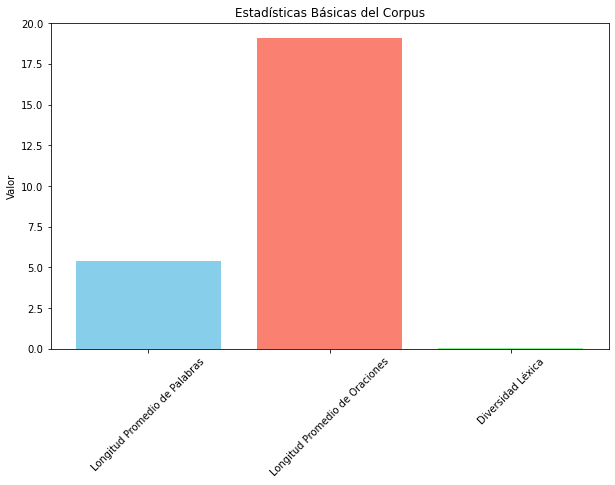

In [ ]:
# Graficamos las estadísticas básicas del corpus

mean_word_length = np.mean(word_lengths)
mean_sentence_length = np.mean(sentence_lengths)
lexical_diversity = lexical_diversity(tokens)

plt.figure(figsize=(10, 6))

plt.bar(['Longitud Promedio de Palabras', 'Longitud Promedio de Oraciones', 'Diversidad Léxica'],
        [mean_word_length, mean_sentence_length, lexical_diversity],
        color=['skyblue', 'salmon', 'lightgreen'])

plt.title('Estadísticas Básicas del Corpus')
plt.ylabel('Valor')
plt.xticks(rotation=45)

plt.show()

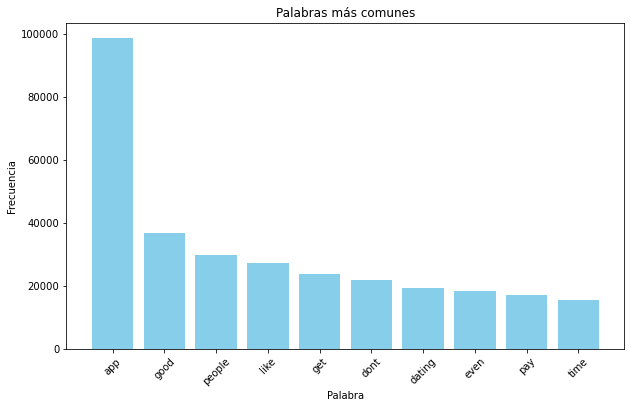

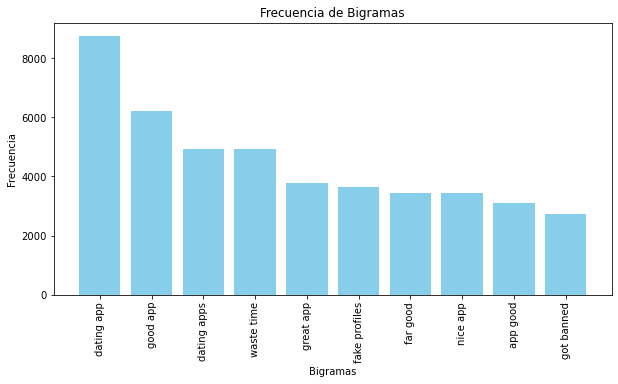

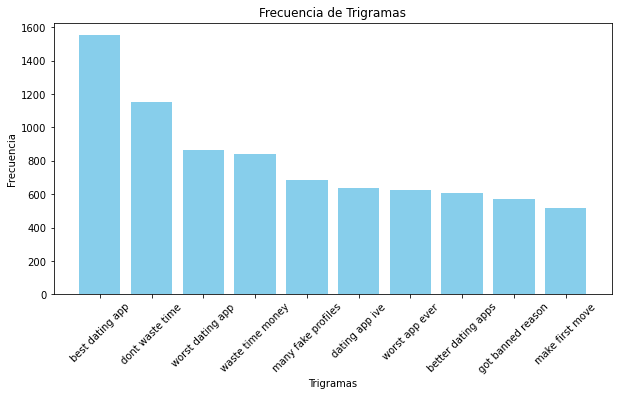

In [ ]:
# Graficamos el conteo de palabras del corpus

plt.figure(figsize=(10, 6))
plt.bar(*zip(*freq.most_common(10)), color='skyblue')
plt.title('Palabras más comunes')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

bigram_freq = bigrams.most_common(10)

bigram_labels = [f"{word1} {word2}" for (word1, word2), count in bigram_freq]
bigram_counts = [count for (word1, word2), count in bigram_freq]

plt.figure(figsize=(10, 5))
plt.bar(bigram_labels, bigram_counts, color='skyblue')
plt.title('Frecuencia de Bigramas')
plt.xlabel('Bigramas')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

trigram_freq = trigrams.most_common(10)

trigram_labels = [f"{word1} {word2} {word3}" for (word1, word2, word3), count in trigram_freq]
trigram_counts = [count for (word1, word2, word3), count in trigram_freq]

plt.figure(figsize=(10, 5))
plt.bar(trigram_labels, trigram_counts, color='skyblue')
plt.title('Frecuencia de Trigramas')
plt.xlabel('Trigramas')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

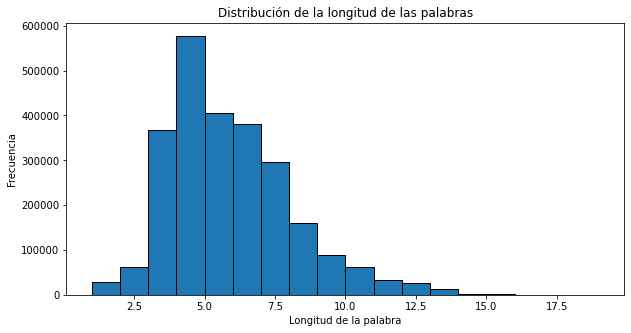

In [ ]:
# Graficamos la distribucion de la logitud de las palabras

plt.figure(figsize=(10, 5))
plt.hist(word_lengths, bins=range(1, 20), edgecolor='black')
plt.title('Distribución de la longitud de las palabras')
plt.xlabel('Longitud de la palabra')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Obtenemos las 250 palabras mas comunes para escoger las que usaremos en el clasificador

freq = Counter(tokens)
print(freq.most_common(250))

[('app', 98548), ('good', 36927), ('people', 29743), ('like', 27216), ('get', 23666), ('dont', 21977), ('dating', 19234), ('even', 18523), ('pay', 17202), ('time', 15515), ('money', 15419), ('matches', 15089), ('im', 14744), ('account', 14739), ('tinder', 14466), ('one', 13756), ('cant', 13496), ('use', 13394), ('nice', 13201), ('far', 13035), ('likes', 12864), ('banned', 12777), ('great', 12743), ('match', 12427), ('see', 11423), ('got', 11290), ('profile', 11232), ('apps', 11180), ('profiles', 10822), ('ive', 10277), ('fake', 10186), ('better', 9826), ('really', 9307), ('still', 8967), ('bumble', 8789), ('premium', 8521), ('free', 8268), ('many', 8238), ('never', 8130), ('want', 8120), ('subscription', 7893), ('would', 7815), ('reason', 7809), ('waste', 7775), ('make', 7616), ('way', 7437), ('women', 7161), ('doesnt', 7084), ('someone', 7027), ('new', 6916), ('best', 6880), ('find', 6803), ('also', 6740), ('first', 6618), ('much', 6586), ('back', 6537), ('message', 6530), ('love', 63

In [ ]:
# Generamos las listas de palabras positivas y negativas

expresiones_positivas = ["good","great","better","best","love","pretty","well","cool","ok","liked","fun","friends","help",
                         "super","awesome","recommend","full","amazing","interesting","always","absolutely"]

lexico_negativo = ["dont", "cant", "banned", "fake", "never", "waste","doesnt","bad", "wont", "worst", "scam", "deleted",
                   "delete", "useless", "bots"]

In [ ]:
# Declaramos la funcion que genera las etiquetas en base a las listas de palabras anteriores

def label_review(tokens, pos_keywords, neg_keywords):
    pos_count = sum(1 for word in tokens if word in pos_keywords)
    neg_count = sum(1 for word in tokens if word in neg_keywords)
    if pos_count > neg_count:
        return 'positiva'
    elif neg_count > pos_count:
        return 'negativa'
    else:
        return 'negativa'

In [ ]:
# Aplicamos la funcion a los tokens procesados

reviews['label'] = reviews['tokens_clean'].apply(lambda x: label_review(x, expresiones_positivas, lexico_negativo))

In [ ]:
# Generamos una nueva columna que vuelve a unir los tokens en oraciones

reviews['content_text'] = reviews['tokens_clean'].apply(lambda x: ' '.join(x))

In [ ]:
# Instanciamos las variables "X" y "y" con las variables independientes y dependiente

X = reviews['content_text']
y = reviews['label']

In [ ]:
# Creamos los conjuntos de entrenamiento y de prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Vectorizamos los conjuntos de variables independientes

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# Instanciamos y entrenamos el modelo con Naive Bayes

clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

MultinomialNB()

In [ ]:
# Realizamos predicciones con el modelo y vemos su rendimiento

y_pred = clf.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9057291666666667
Classification Report:
              precision    recall  f1-score   support

    negativa       0.95      0.91      0.93     32084
    positiva       0.83      0.90      0.86     15916

    accuracy                           0.91     48000
   macro avg       0.89      0.90      0.90     48000
weighted avg       0.91      0.91      0.91     48000



In [ ]:
# Veamos de nuevo el dataframe para recordarlo

reviews.head()

,content,clasificacion,tokens,tokens_clean,label,content_text
0,oops something went wrong every time i try to log in,negativa,"[oops, something, went, wrong, every, time, i, try, to, log, in]","[oops, something, went, wrong, every, time, try, log]",negativa,oops something went wrong every time try log
1,the limited amount of likes plus the amount of spam bots makes the whole experience trash i really wish i could give it zero stars edit update wow...,negativa,"[the, limited, amount, of, likes, plus, the, amount, of, spam, bots, makes, the, whole, experience, trash, i, really, wish, i, could, give, it, ze...","[limited, amount, likes, plus, amount, spam, bots, makes, whole, experience, trash, really, wish, could, give, zero, stars, edit, update, wow, app...",negativa,limited amount likes plus amount spam bots makes whole experience trash really wish could give zero stars edit update wow app sucksthen balls ask ...
2,ehhh i prefer meeting people face to face but that has become a lost art form sometimes you have to try something new,negativa,"[ehhh, i, prefer, meeting, people, face, to, face, but, that, has, become, a, lost, art, form, sometimes, you, have, to, try, something, new]","[ehhh, prefer, meeting, people, face, face, become, lost, art, form, sometimes, try, something, new]",negativa,ehhh prefer meeting people face face become lost art form sometimes try something new
3,you broke it this app was already broken and all around lacking in comparison to other dating apps available and just when you thought it cant get...,negativa,"[you, broke, it, this, app, was, already, broken, and, all, around, lacking, in, comparison, to, other, dating, apps, available, and, just, when, ...","[broke, app, already, broken, around, lacking, comparison, dating, apps, available, thought, cant, get, anyworse, youve, completely, flubbered, to...",negativa,broke app already broken around lacking comparison dating apps available thought cant get anyworse youve completely flubbered tools add remove pho...
4,just got the app today says its under review should only take a couple minutes i cant get into it and this has been hours now,negativa,"[just, got, the, app, today, says, its, under, review, should, only, take, a, couple, minutes, i, cant, get, into, it, and, this, has, been, hours...","[got, app, today, says, review, take, couple, minutes, cant, get, hours]",negativa,got app today says review take couple minutes cant get hours


In [ ]:
# Veamos una representacion del BoW en un dataframe

vectorizador = CountVectorizer(min_df=2000)
X = vectorizador.fit_transform(reviews['content_text'])
vocabulario = vectorizador.get_feature_names()
df_bow = pd.DataFrame(X.toarray(), columns=vocabulario)
df_bow.head()

C:\Users\William\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,able,absolutely,account,accounts,actually,already,also,always,amazing,another,...,work,working,works,worst,worth,would,wrong,years,yet,youre
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,2,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Volvemos a vectorizar los de entrenamiento

vectorizador = CountVectorizer()
X = vectorizador.fit_transform(reviews['content_text'])

In [ ]:
%%time
# Entrenamos el modelo con regresión logística, y vemos sus resultados

X_train, X_test, y_train, y_test = train_test_split(X, reviews['clasificacion'], test_size=0.2, random_state=42)

modelo = LogisticRegression()

modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

precision = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {precision}')
print(classification_report(y_test, y_pred))

C:\Users\William\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precisión del modelo: 0.8721041666666667
              precision    recall  f1-score   support

    negativa       0.91      0.86      0.88     27296
    positiva       0.83      0.88      0.86     20704

    accuracy                           0.87     48000
   macro avg       0.87      0.87      0.87     48000
weighted avg       0.87      0.87      0.87     48000

CPU times: total: 7.22 s
Wall time: 3.97 s


In [ ]:
# Referenciamos nuevamente el dataframe

reviews.head()

,content,clasificacion,tokens,tokens_clean,label,content_text
0,oops something went wrong every time i try to log in,negativa,"[oops, something, went, wrong, every, time, i, try, to, log, in]","[oops, something, went, wrong, every, time, try, log]",negativa,oops something went wrong every time try log
1,the limited amount of likes plus the amount of spam bots makes the whole experience trash i really wish i could give it zero stars edit update wow...,negativa,"[the, limited, amount, of, likes, plus, the, amount, of, spam, bots, makes, the, whole, experience, trash, i, really, wish, i, could, give, it, ze...","[limited, amount, likes, plus, amount, spam, bots, makes, whole, experience, trash, really, wish, could, give, zero, stars, edit, update, wow, app...",negativa,limited amount likes plus amount spam bots makes whole experience trash really wish could give zero stars edit update wow app sucksthen balls ask ...
2,ehhh i prefer meeting people face to face but that has become a lost art form sometimes you have to try something new,negativa,"[ehhh, i, prefer, meeting, people, face, to, face, but, that, has, become, a, lost, art, form, sometimes, you, have, to, try, something, new]","[ehhh, prefer, meeting, people, face, face, become, lost, art, form, sometimes, try, something, new]",negativa,ehhh prefer meeting people face face become lost art form sometimes try something new
3,you broke it this app was already broken and all around lacking in comparison to other dating apps available and just when you thought it cant get...,negativa,"[you, broke, it, this, app, was, already, broken, and, all, around, lacking, in, comparison, to, other, dating, apps, available, and, just, when, ...","[broke, app, already, broken, around, lacking, comparison, dating, apps, available, thought, cant, get, anyworse, youve, completely, flubbered, to...",negativa,broke app already broken around lacking comparison dating apps available thought cant get anyworse youve completely flubbered tools add remove pho...
4,just got the app today says its under review should only take a couple minutes i cant get into it and this has been hours now,negativa,"[just, got, the, app, today, says, its, under, review, should, only, take, a, couple, minutes, i, cant, get, into, it, and, this, has, been, hours...","[got, app, today, says, review, take, couple, minutes, cant, get, hours]",negativa,got app today says review take couple minutes cant get hours


In [ ]:
# Nueva tokenizacion y eliminacion de stopwords

reviews['tokens2'] = reviews['content'].apply(word_tokenize)

stop_words = set(stopwords.words('english'))
reviews['tokens_clean2'] = reviews['tokens2'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

In [ ]:
# Mostramos el resultado en el dataframe

reviews.head()

,content,clasificacion,tokens,tokens_clean,label,content_text,tokens2,tokens_clean2
0,oops something went wrong every time i try to log in,negativa,"[oops, something, went, wrong, every, time, i, try, to, log, in]","[oops, something, went, wrong, every, time, try, log]",negativa,oops something went wrong every time try log,"[oops, something, went, wrong, every, time, i, try, to, log, in]","[oops, something, went, wrong, every, time, try, log]"
1,the limited amount of likes plus the amount of spam bots makes the whole experience trash i really wish i could give it zero stars edit update wow...,negativa,"[the, limited, amount, of, likes, plus, the, amount, of, spam, bots, makes, the, whole, experience, trash, i, really, wish, i, could, give, it, ze...","[limited, amount, likes, plus, amount, spam, bots, makes, whole, experience, trash, really, wish, could, give, zero, stars, edit, update, wow, app...",negativa,limited amount likes plus amount spam bots makes whole experience trash really wish could give zero stars edit update wow app sucksthen balls ask ...,"[the, limited, amount, of, likes, plus, the, amount, of, spam, bots, makes, the, whole, experience, trash, i, really, wish, i, could, give, it, ze...","[limited, amount, likes, plus, amount, spam, bots, makes, whole, experience, trash, really, wish, could, give, zero, stars, edit, update, wow, app..."
2,ehhh i prefer meeting people face to face but that has become a lost art form sometimes you have to try something new,negativa,"[ehhh, i, prefer, meeting, people, face, to, face, but, that, has, become, a, lost, art, form, sometimes, you, have, to, try, something, new]","[ehhh, prefer, meeting, people, face, face, become, lost, art, form, sometimes, try, something, new]",negativa,ehhh prefer meeting people face face become lost art form sometimes try something new,"[ehhh, i, prefer, meeting, people, face, to, face, but, that, has, become, a, lost, art, form, sometimes, you, have, to, try, something, new]","[ehhh, prefer, meeting, people, face, face, become, lost, art, form, sometimes, try, something, new]"
3,you broke it this app was already broken and all around lacking in comparison to other dating apps available and just when you thought it cant get...,negativa,"[you, broke, it, this, app, was, already, broken, and, all, around, lacking, in, comparison, to, other, dating, apps, available, and, just, when, ...","[broke, app, already, broken, around, lacking, comparison, dating, apps, available, thought, cant, get, anyworse, youve, completely, flubbered, to...",negativa,broke app already broken around lacking comparison dating apps available thought cant get anyworse youve completely flubbered tools add remove pho...,"[you, broke, it, this, app, was, already, broken, and, all, around, lacking, in, comparison, to, other, dating, apps, available, and, just, when, ...","[broke, app, already, broken, around, lacking, comparison, dating, apps, available, thought, cant, get, anyworse, youve, completely, flubbered, to..."
4,just got the app today says its under review should only take a couple minutes i cant get into it and this has been hours now,negativa,"[just, got, the, app, today, says, its, under, review, should, only, take, a, couple, minutes, i, cant, get, into, it, and, this, has, been, hours...","[got, app, today, says, review, take, couple, minutes, cant, get, hours]",negativa,got app today says review take couple minutes cant get hours,"[just, got, the, app, today, says, its, under, review, should, only, take, a, couple, minutes, i, cant, get, into, it, and, this, has, been, hours...","[got, app, today, says, review, take, couple, minutes, cant, get, hours]"


In [ ]:
# Creamos documentos a partir de los tokens

tagged_docs = [TaggedDocument(doc, [i]) for i, doc in enumerate(reviews['tokens2'])]

In [ ]:
# Con los documentos creados formamos el corpus

corpus = [doc.words for doc in tagged_docs]

In [ ]:
# Instanciammos el modelo Word2Vec

model = Word2Vec(corpus, vector_size=100, window=5, min_count=2, workers=-1)

In [ ]:
# Declaramos la funcion para obtener los embeddings y la aplicamos

def get_embeddings(tokens):
    return [model.wv[token] for token in tokens if token in model.wv]

reviews['embeddings'] = reviews['tokens2'].apply(get_embeddings)

In [ ]:
# Vemos nuevamente el dataframe con los cambios aplicados

reviews.head()

,content,clasificacion,tokens,tokens_clean,label,content_text,tokens2,tokens_clean2,embeddings
0,oops something went wrong every time i try to log in,negativa,"[oops, something, went, wrong, every, time, i, try, to, log, in]","[oops, something, went, wrong, every, time, try, log]",negativa,oops something went wrong every time try log,"[oops, something, went, wrong, every, time, i, try, to, log, in]","[oops, something, went, wrong, every, time, try, log]","[[-0.0053854943, 9.9549296e-05, -0.0040655825, -0.0005111277, 0.0047601904, -0.004295032, 0.0016536462, 0.0032448708, -0.005204047, -0.002974893, ..."
1,the limited amount of likes plus the amount of spam bots makes the whole experience trash i really wish i could give it zero stars edit update wow...,negativa,"[the, limited, amount, of, likes, plus, the, amount, of, spam, bots, makes, the, whole, experience, trash, i, really, wish, i, could, give, it, ze...","[limited, amount, likes, plus, amount, spam, bots, makes, whole, experience, trash, really, wish, could, give, zero, stars, edit, update, wow, app...",negativa,limited amount likes plus amount spam bots makes whole experience trash really wish could give zero stars edit update wow app sucksthen balls ask ...,"[the, limited, amount, of, likes, plus, the, amount, of, spam, bots, makes, the, whole, experience, trash, i, really, wish, i, could, give, it, ze...","[limited, amount, likes, plus, amount, spam, bots, makes, whole, experience, trash, really, wish, could, give, zero, stars, edit, update, wow, app...","[[-0.0086196875, 0.003665738, 0.0051898835, 0.0057419385, 0.0074669183, -0.0061676754, 0.0011056137, 0.0060472824, -0.0028400505, -0.0061735227, -..."
2,ehhh i prefer meeting people face to face but that has become a lost art form sometimes you have to try something new,negativa,"[ehhh, i, prefer, meeting, people, face, to, face, but, that, has, become, a, lost, art, form, sometimes, you, have, to, try, something, new]","[ehhh, prefer, meeting, people, face, face, become, lost, art, form, sometimes, try, something, new]",negativa,ehhh prefer meeting people face face become lost art form sometimes try something new,"[ehhh, i, prefer, meeting, people, face, to, face, but, that, has, become, a, lost, art, form, sometimes, you, have, to, try, something, new]","[ehhh, prefer, meeting, people, face, face, become, lost, art, form, sometimes, try, something, new]","[[-0.0014426529, -0.005894495, 0.008764156, 0.005666939, -0.008659887, -0.0015493167, -0.009906403, 0.001399312, 0.001910932, -0.00479782, 0.00839..."
3,you broke it this app was already broken and all around lacking in comparison to other dating apps available and just when you thought it cant get...,negativa,"[you, broke, it, this, app, was, already, broken, and, all, around, lacking, in, comparison, to, other, dating, apps, available, and, just, when, ...","[broke, app, already, broken, around, lacking, comparison, dating, apps, available, thought, cant, get, anyworse, youve, completely, flubbered, to...",negativa,broke app already broken around lacking comparison dating apps available thought cant get anyworse youve completely flubbered tools add remove pho...,"[you, broke, it, this, app, was, already, broken, and, all, around, lacking, in, comparison, to, other, dating, apps, available, and, just, when, ...","[broke, app, already, broken, around, lacking, comparison, dating, apps, available, thought, cant, get, anyworse, youve, completely, flubbered, to...","[[0.0081322715, -0.004457334, -0.0010683573, 0.0010063648, -0.00019111396, 0.0011481774, 0.0061138608, -2.027154e-05, -0.0032459653, -0.0015107286..."
4,just got the app today says its under review should only take a couple minutes i cant get into it and this has been hours now,negativa,"[just, got, the, app, today, says, its, under, review, should, only, take, a, couple, minutes, i, cant, get, into, it, and, this, has, been, hours...","[got, app, today, says, review, take, couple, minutes, cant, get, hou

In [ ]:
# Obtenemos la media de los embeddings para crear el embedding de la reseña

reviews['reseña_embedding'] = reviews['embeddings'].apply(lambda x: np.mean(x, axis=0))

C:\Users\William\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [ ]:
# Vemos si existen valores nulos (1.40%) y los eliminamos

print(reviews['reseña_embedding'].isnull().sum())
reviews = reviews.dropna(subset=['reseña_embedding'])

3381


In [ ]:
# Convertimos los embeddings de la reseña en una lista en el caso de que sean arrays

reviews['reseña_embedding'] = reviews['reseña_embedding'].apply(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)

C:\Users\William\AppData\Local\Temp\ipykernel_17772\243078421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['reseña_embedding'] = reviews['reseña_embedding'].apply(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)


In [ ]:
# Mostramos en pantalla el resultado de la generacion de los embeddings

reviews.head()

,content,clasificacion,tokens,tokens_clean,label,content_text,tokens2,tokens_clean2,embeddings,reseña_embedding
0,oops something went wrong every time i try to log in,negativa,"[oops, something, went, wrong, every, time, i, try, to, log, in]","[oops, something, went, wrong, every, time, try, log]",negativa,oops something went wrong every time try log,"[oops, something, went, wrong, every, time, i, try, to, log, in]","[oops, something, went, wrong, every, time, try, log]","[[-0.0053854943, 9.9549296e-05, -0.0040655825, -0.0005111277, 0.0047601904, -0.004295032, 0.0016536462, 0.0032448708, -0.005204047, -0.002974893, ...","[-0.0022163251414895058, 0.0010832539992406964, -0.0008100781706161797, -0.0019253379432484508, 0.0011471192119643092, -0.002527377102524042, -0.0..."
1,the limited amount of likes plus the amount of spam bots makes the whole experience trash i really wish i could give it zero stars edit update wow...,negativa,"[the, limited, amount, of, likes, plus, the, amount, of, spam, bots, makes, the, whole, experience, trash, i, really, wish, i, could, give, it, ze...","[limited, amount, likes, plus, amount, spam, bots, makes, whole, experience, trash, really, wish, could, give, zero, stars, edit, update, wow, app...",negativa,limited amount likes plus amount spam bots makes whole experience trash really wish could give zero stars edit update wow app sucksthen balls ask ...,"[the, limited, amount, of, likes, plus, the, amount, of, spam, bots, makes, the, whole, experience, trash, i, really, wish, i, could, give, it, ze...","[limited, amount, likes, plus, amount, spam, bots, makes, whole, experience, trash, really, wish, could, give, zero, stars, edit, update, wow, app...","[[-0.0086196875, 0.003665738, 0.0051898835, 0.0057419385, 0.0074669183, -0.0061676754, 0.0011056137, 0.0060472824, -0.0028400505, -0.0061735227, -...","[-0.0006637899787165225, 0.0005335596506483853, 0.0011016296921297908, 0.0018763351254165173, 0.0016876272857189178, -0.0006242825766094029, -0.00..."
2,ehhh i prefer meeting people face to face but that has become a lost art form sometimes you have to try something new,negativa,"[ehhh, i, prefer, meeting, people, face, to, face, but, that, has, become, a, lost, art, form, sometimes, you, have, to, try, something, new]","[ehhh, prefer, meeting, people, face, face, become, lost, art, form, sometimes, try, something, new]",negativa,ehhh prefer meeting people face face become lost art form sometimes try something new,"[ehhh, i, prefer, meeting, people, face, to, face, but, that, has, become, a, lost, art, form, sometimes, you, have, to, try, something, new]","[ehhh, prefer, meeting, people, face, face, become, lost, art, form, sometimes, try, something, new]","[[-0.0014426529, -0.005894495, 0.008764156, 0.005666939, -0.008659887, -0.0015493167, -0.009906403, 0.001399312, 0.001910932, -0.00479782, 0.00839...","[5.593078185484046e-06, 0.0025410070084035397, 0.000978256342932582, 0.0010050784330815077, -0.0022030225954949856, -0.0002592111995909363, 0.0014..."
3,you broke it this app was already broken and all around lacking in comparison to other dating apps available and just when you thought it cant get...,negativa,"[you, broke, it, this, app, was, already, broken, and, all, around, lacking, in, comparison, to, other, dating, apps, available, and, just, when, ...","[broke, app, already, broken, around, lacking, comparison, dating, apps, available, thought, cant, get, anyworse, youve, completely, flubbered, to...",negativa,broke app already broken around lacking comparison dating apps available thought cant get anyworse youve completely flubbered tools add remove pho...,"[you, broke, it, this, app, was, already, broken, and, all, around, lacking, in, comparison, to, other, dating, apps, available, and, just, when, ...","[broke, app, already, broken, around, lacking, comparison, dating, apps, available, thought, cant, get, anyworse, youve, completely, flubbered, to...","[[0.0081322715, -0.004457334, -0.0010

In [ ]:
# Establecemos la dimension del embedding y excluimos aquellos que no cumplan con este tamaño

embedding_dim = 100
reviews = reviews[reviews['reseña_embedding'].apply(lambda x: len(x) == embedding_dim)]

In [ ]:
# Instanciamos los conjuntos de variables dependientes e independiente y las mostramos en pantalla

X = np.array(reviews['reseña_embedding'].tolist())
y = reviews['label']
print(X.shape)
print(X)
print(y)

(236619, 100)
[[-2.21632514e-03  1.08325400e-03 -8.10078171e-04 ... -1.62885257e-03
  -1.99154275e-03  5.41412737e-04]
 [-6.63789979e-04  5.33559651e-04  1.10162969e-03 ...  2.96762446e-04
  -5.79849642e-04 -5.26927295e-04]
 [ 5.59307819e-06  2.54100701e-03  9.78256343e-04 ... -1.46074931e-03
   3.92697664e-04  3.39466264e-03]
 ...
 [-6.43412059e-04  7.68555852e-04  3.71719711e-04 ... -1.63617404e-03
  -1.30563951e-03  9.48713161e-04]
 [-5.49526187e-04  9.03399836e-04  2.31989543e-03 ...  8.76309408e-04
  -7.69758830e-04 -2.02083960e-03]
 [-3.71365785e-03 -3.83707066e-03  1.85710914e-03 ... -5.63979521e-03
  -2.39782501e-03 -1.24164810e-03]]
0         negativa
1         negativa
2         negativa
3         negativa
4         negativa
            ...   
239995    positiva
239996    negativa
239997    positiva
239998    negativa
239999    positiva
Name: label, Length: 236619, dtype: object


In [ ]:
# Dividimos los conjuntos de prueba y entrenamiento, instanciamos el clasificador, lo entrenamos y evaluamos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clasificador = LogisticRegression(max_iter=2000)

clasificador.fit(X_train, y_train)

y_pred = clasificador.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
precision = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {precision}')

[[31174   137]
 [ 9780  6233]]
              precision    recall  f1-score   support

    negativa       0.76      1.00      0.86     31311
    positiva       0.98      0.39      0.56     16013

    accuracy                           0.79     47324
   macro avg       0.87      0.69      0.71     47324
weighted avg       0.83      0.79      0.76     47324

Precisión del modelo: 0.7904445947088158


In [ ]:
# Ahora instanciamos un modelo de clasificacion Naive Bayes

X = np.array(reviews['reseña_embedding'].tolist())
y = reviews['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6910024511875581
Classification Report:
              precision    recall  f1-score   support

    negativa       0.74      0.82      0.78     31311
    positiva       0.55      0.45      0.49     16013

    accuracy                           0.69     47324
   macro avg       0.65      0.63      0.64     47324
weighted avg       0.68      0.69      0.68     47324



In [ ]:
# Volvemos a mostrar en pantalla nuestro dataframe

reviews.head()

,content,clasificacion,tokens,tokens_clean,label,content_text,tokens2,tokens_clean2,embeddings,reseña_embedding
0,oops something went wrong every time i try to log in,negativa,"[oops, something, went, wrong, every, time, i, try, to, log, in]","[oops, something, went, wrong, every, time, try, log]",negativa,oops something went wrong every time try log,"[oops, something, went, wrong, every, time, i, try, to, log, in]","[oops, something, went, wrong, every, time, try, log]","[[-0.0053854943, 9.9549296e-05, -0.0040655825, -0.0005111277, 0.0047601904, -0.004295032, 0.0016536462, 0.0032448708, -0.005204047, -0.002974893, ...","[-0.0022163251414895058, 0.0010832539992406964, -0.0008100781706161797, -0.0019253379432484508, 0.0011471192119643092, -0.002527377102524042, -0.0..."
1,the limited amount of likes plus the amount of spam bots makes the whole experience trash i really wish i could give it zero stars edit update wow...,negativa,"[the, limited, amount, of, likes, plus, the, amount, of, spam, bots, makes, the, whole, experience, trash, i, really, wish, i, could, give, it, ze...","[limited, amount, likes, plus, amount, spam, bots, makes, whole, experience, trash, really, wish, could, give, zero, stars, edit, update, wow, app...",negativa,limited amount likes plus amount spam bots makes whole experience trash really wish could give zero stars edit update wow app sucksthen balls ask ...,"[the, limited, amount, of, likes, plus, the, amount, of, spam, bots, makes, the, whole, experience, trash, i, really, wish, i, could, give, it, ze...","[limited, amount, likes, plus, amount, spam, bots, makes, whole, experience, trash, really, wish, could, give, zero, stars, edit, update, wow, app...","[[-0.0086196875, 0.003665738, 0.0051898835, 0.0057419385, 0.0074669183, -0.0061676754, 0.0011056137, 0.0060472824, -0.0028400505, -0.0061735227, -...","[-0.0006637899787165225, 0.0005335596506483853, 0.0011016296921297908, 0.0018763351254165173, 0.0016876272857189178, -0.0006242825766094029, -0.00..."
2,ehhh i prefer meeting people face to face but that has become a lost art form sometimes you have to try something new,negativa,"[ehhh, i, prefer, meeting, people, face, to, face, but, that, has, become, a, lost, art, form, sometimes, you, have, to, try, something, new]","[ehhh, prefer, meeting, people, face, face, become, lost, art, form, sometimes, try, something, new]",negativa,ehhh prefer meeting people face face become lost art form sometimes try something new,"[ehhh, i, prefer, meeting, people, face, to, face, but, that, has, become, a, lost, art, form, sometimes, you, have, to, try, something, new]","[ehhh, prefer, meeting, people, face, face, become, lost, art, form, sometimes, try, something, new]","[[-0.0014426529, -0.005894495, 0.008764156, 0.005666939, -0.008659887, -0.0015493167, -0.009906403, 0.001399312, 0.001910932, -0.00479782, 0.00839...","[5.593078185484046e-06, 0.0025410070084035397, 0.000978256342932582, 0.0010050784330815077, -0.0022030225954949856, -0.0002592111995909363, 0.0014..."
3,you broke it this app was already broken and all around lacking in comparison to other dating apps available and just when you thought it cant get...,negativa,"[you, broke, it, this, app, was, already, broken, and, all, around, lacking, in, comparison, to, other, dating, apps, available, and, just, when, ...","[broke, app, already, broken, around, lacking, comparison, dating, apps, available, thought, cant, get, anyworse, youve, completely, flubbered, to...",negativa,broke app already broken around lacking comparison dating apps available thought cant get anyworse youve completely flubbered tools add remove pho...,"[you, broke, it, this, app, was, already, broken, and, all, around, lacking, in, comparison, to, other, dating, apps, available, and, just, when, ...","[broke, app, already, broken, around, lacking, comparison, dating, apps, available, thought, cant, get, anyworse, youve, completely, flubbered, to...","[[0.0081322715, -0.004457334, -0.0010

In [ ]:
# Volvemos a tomar las embeddings que cumplan con la dimension establecida, mapeamos las variables categóricas negativa y
# positiva a 0 y 1 respectivameente, generamos los conjuntos de prueba y entrenamiento y entrenamos el modelo de clasificacion
# con DL

reviews = reviews.dropna(subset=['reseña_embedding'])
embedding_dim = 100
reviews = reviews[reviews['reseña_embedding'].apply(lambda x: len(x) == embedding_dim)]
reviews['clasificacion'] = reviews['label'].map({'negativa': 0, 'positiva': 1})
X = np.array(reviews['reseña_embedding'].tolist())
y = reviews['clasificacion']
print(reviews['clasificacion'].unique())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y_train.dtype, y_test.dtype)
print(np.unique(y_train), np.unique(y_test))

modelo = Sequential()
modelo.add(Dense(128, input_dim=embedding_dim, activation='relu'))
modelo.add(Dropout(0.5))
modelo.add(Dense(64, activation='relu'))
modelo.add(Dropout(0.5))
modelo.add(Dense(1, activation='sigmoid'))

modelo.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

historia = modelo.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

[0 1]
int64 int64
[0 1] [0 1]


Epoch 1/10


5916/5916 [==============================] - 12s 2ms/step - loss: 0.3868 - accuracy: 0.8323 - val_loss: 0.3171 - val_accuracy: 0.8627
Epoch 2/10
5916/5916 [==============================] - 9s 2ms/step - loss: 0.3218 - accuracy: 0.8616 - val_loss: 0.2964 - val_accuracy: 0.8693
Epoch 3/10
5916/5916 [==============================] - 10s 2ms/step - loss: 0.3045 - accuracy: 0.8689 - val_loss: 0.2743 - val_accuracy: 0.8840
Epoch 4/10
5916/5916 [==============================] - 10s 2ms/step - loss: 0.2946 - accuracy: 0.8730 - val_loss: 0.2634 - val_accuracy: 0.8872
Epoch 5/10
5916/5916 [==============================] - 9s 2ms/step - loss: 0.2879 - accuracy: 0.8755 - val_loss: 0.2574 - val_accuracy: 0.8884
Epoch 6/10
5916/5916 [==============================] - 10s 2ms/step - loss: 0.2809 - accuracy: 0.8780 - val_loss: 0.2515 - val_accuracy: 0.8928
Epoch 7/10
5916/5916 [==============================] - 10s 2ms/step - loss: 0.2768 - accuracy: 0.

In [ ]:
# Evaluamos el rendimiento del modelo

score = modelo.evaluate(X_test, y_test, verbose=0)
print(f'Pérdida en el conjunto de prueba: {score[0]}')
print(f'Exactitud en el conjunto de prueba: {score[1]}')

y_pred = modelo.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

print(confusion_matrix(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes))


Pérdida en el conjunto de prueba: 0.2372158318758011
Exactitud en el conjunto de prueba: 0.8997126221656799
1479/1479 [==============================] - 1s 772us/step
[[30351   960]
 [ 3786 12227]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     31311
           1       0.93      0.76      0.84     16013

    accuracy                           0.90     47324
   macro avg       0.91      0.87      0.88     47324
weighted avg       0.90      0.90      0.90     47324



In [ ]:
# Volvemos a tokenizar las reseñas

tokenizer = Tokenizer()
tokenizer.fit_on_texts(reviews['content'].values)
X = tokenizer.texts_to_sequences(reviews['content'].values)
X = pad_sequences(X)

In [ ]:
# Obtenemos el vocabulario y establecemos las dimensiones de los embeddings

vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
max_length = X.shape[1]

In [ ]:
# Instanciamos el modelo de clasificacion con LSTM

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Creamos los conjuntos de prueba y entrenamiento

y = reviews['clasificacion'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Establecemos los checkpoints para guardar el entrenamiento en caso de que se detenga y entrenamos el modelo

checkpoint_dir = 'checkpoints'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

checkpoint_path = os.path.join(checkpoint_dir, 'checkpoint_epoch_{epoch:02d}_val_loss_{val_loss:.2f}.hdf5')
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True)

history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test),
                    callbacks=[checkpoint_callback])

Epoch 1/5
5916/5916 [==============================] - ETA: 0s - loss: 0.0421 - accuracy: 0.9837
Epoch 1: val_loss improved from inf to 0.00524, saving model to checkpoints\checkpoint_epoch_01_val_loss_0.01.hdf5
5916/5916 [==============================] - 3382s 571ms/step - loss: 0.0421 - accuracy: 0.9837 - val_loss: 0.0052 - val_accuracy: 0.9980
Epoch 2/5


C:\Users\William\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5916/5916 [==============================] - ETA: 0s - loss: 0.0044 - accuracy: 0.9988
Epoch 2: val_loss did not improve from 0.00524
5916/5916 [==============================] - 4260s 720ms/step - loss: 0.0044 - accuracy: 0.9988 - val_loss: 0.0204 - val_accuracy: 0.9945
Epoch 3/5
5916/5916 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 0.9995
Epoch 3: val_loss improved from 0.00524 to 0.00193, saving model to checkpoints\checkpoint_epoch_03_val_loss_0.00.hdf5
5916/5916 [==============================] - 4628s 782ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0019 - val_accuracy: 0.9995
Epoch 4/5
5916/5916 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 0.9997
Epoch 4: val_loss improved from 0.00193 to 0.00098, saving model to checkpoints\checkpoint_epoch_04_val_loss_0.00.hdf5
5916/5916 [==============================] - 4665s 789ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 9.8087e-04 - val_accuracy: 0.9998
Epoch 5/5
5916/5

In [ ]:
# Evaluamos el rendimiento del modelo

score = model.evaluate(X_test, y_test, verbose=0)
print(f'Pérdida en el conjunto de prueba: {score[0]}')
print(f'Exactitud en el conjunto de prueba: {score[1]}')

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

print(confusion_matrix(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes))


Pérdida en el conjunto de prueba: 0.0015400211559608579
Exactitud en el conjunto de prueba: 0.9996407628059387
1479/1479 [==============================] - 554s 375ms/step
[[31304     7]
 [   10 16003]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31311
           1       1.00      1.00      1.00     16013

    accuracy                           1.00     47324
   macro avg       1.00      1.00      1.00     47324
weighted avg       1.00      1.00      1.00     47324

